# Visualizing the data structure



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize, LogNorm, TwoSlopeNorm
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib import markers
from scipy.interpolate import CubicSpline

from pymob import Config, SimulationBase

In [2]:
# load case study
config = Config("../scenarios/data_structure_experimental/settings.cfg")
config.case_study.root = "../../.."
config.import_casestudy_modules()
config.case_study.scenario = "data_structure_experimental"

from case_studies.hierarchical_ode_model.sim import NomixHierarchicalSimulation
sim = NomixHierarchicalSimulation(config)

Working directory: '/home/flo-schu/projects/pymob'.
Inserted '/home/flo-schu/projects/pymob/case_studies' in PATH at index=0
Inserted '/home/flo-schu/projects/pymob/case_studies/hierarchical_ode_model' in PATH at index=0
Inserted './case_studies' in PATH at index=0
Inserted './case_studies/tktd_rna_pulse' in PATH at index=0
Inserted './case_studies' in PATH at index=0
Inserted './case_studies/tktd_rna_pulse' in PATH at index=0


/home/flo-schu/projects/pymob/pymob/sim/parameters.py:270: UserWarning: Declaring parameter values of a shapes (3,) > 1without specifiying Param(..., dims=(...)) is dangerous.If the dimension should represent only the batch dimension (e.g.)the replicate dimension, you can simply add it here.If the dimension is part of the model, you should absolutelyspecify it along with one of the following options: 1) dimension in sim.config.data_structure and sim.coordinates 2) dimension in sim.config.parameters and sim.coordinates 3) dimension in sim.indices an index or a coordinate and DataVariable.If this dimension is not somehow part of the datastructure of thesimulation consider if you really need it.
  warnings.warn(


In [3]:
sim.config.simulation.hpf = 24
sim.config.simulation.substance = "diuron"
sim.initialize(None)

In [4]:
Ci = sim.observations.cint

# filter Ci observations
Ci = Ci.where(~Ci.isnull().all("time"), drop=True)

Ci

<xarray.DataArray 'cint' (id: 25, time: 17)>
array([[1.00000000e-08, 9.86530451e+02, 1.48236000e+03, 1.65311378e+03,
        1.64973196e+03,            nan, 1.75699456e+03, 1.61759418e+03,
        1.33377673e+03,            nan, 1.20224924e+03, 1.09769099e+03,
                   nan, 9.87844407e+02, 7.45951572e+02,            nan,
        5.76897352e+02],
       [1.00000000e-08,            nan, 5.69387199e+03, 6.35543923e+03,
                   nan, 5.47636137e+03,            nan,            nan,
        6.58276309e+03,            nan,            nan, 3.36015782e+03,
                   nan,            nan, 2.19935429e+03,            nan,
        2.01734619e+03],
       [1.00000000e-08,            nan, 4.66348857e+03, 4.79122564e+03,
                   nan, 4.60453497e+03,            nan,            nan,
        6.29758924e+03,            nan,            nan, 4.05009618e+03,
                   nan,            nan, 1.80205158e+03,            nan,
        1.96154726e+03],
       [1.00000000e-08,            nan, 4.84414021e+03, 4.97525077e+03,
                   nan, 5.57968894e+03,            nan,            nan,
        5.74506490e+03,            nan,            nan, 4.74003455e+03,
                   nan,            nan, 2.22773306e+03,            nan,
        1.71259815e+03],
...
       [1.00000000e-08, 1.72804435e+02, 2.80732645e+02, 2.77967747e+02,
                   nan,            nan, 3.40523112e+02,            nan,
        2.73208243e+02, 2.14491925e+02,            nan, 1.97556487e+02,
        2.54420557e+02,            nan, 1.56777636e+02,            nan,
                   nan],
       [1.00000000e-08,            nan,            nan, 3.77241942e+02,
                   nan,            nan, 2.71017604e+02,            nan,
        3.21568096e+02,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan],
       [1.00000000e-08,            nan, 7.42257113e+02, 8.05224029e+02,
                   nan,            nan, 7.58094967e+02,            nan,
        8.01178186e+02, 8.84054554e+02,            nan, 6.22722797e+02,
        6.10265526e+02,            nan, 4.93750327e+02,            nan,
                   nan],
       [1.00000000e-08, 2.33413288e+02, 8.14847860e+02, 6.14999529e+02,
        4.80756588e+02,            nan, 6.32774951e+02, 4.69153606e+02,
        4.33992010e+02,            nan, 3.69501739e+02, 2.93227208e+02,
                   nan, 3.08912150e+02, 2.68909759e+02, 6.48073505e+02,
        4.92782846e+02]])
Coordinates:
  * time                 (time) float64 24.0 25.5 27.0 30.0 ... 96.0 108.0 120.0
  * id                   (id) object '42_0' '44_0' '44_1' ... '75_0' '8_0'
    cext_nom_naproxen    (id) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cext_nom_diclofenac  (id) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hpf                  (id) float64 24.0 24.0 24.0 24.0 ... 24.0 24.0 24.0
    nzfe                 (id, time) int64 20 20 20 20 20 20 ... 20 20 20 20 20
    treatment_id         (id) int64 42 44 44 44 44 44 44 ... 70 70 74 74 74 75 8
    experiment_id        (id) int64 14 16 16 16 16 16 16 ... 30 30 31 31 31 31 2
    cext_nom             (id) float64 23.35 29.46 29.46 ... 19.99 20.51 14.06
    substance            (id) <U6 'diuron' 'diuron' ... 'diuron' 'diuron'
    substance_index      (id) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    survivors_before_t   (id, time) int64 20 20 20 20 20 20 ... 20 20 20 20 20
Attributes:
    cext_diuron:           µmol L-1
    cint_diuron:           µmol L-1
    nrf2:                  fold-change
    lethality:             count
    substance:             ['diuron']
    ids_subset:            []
    excluded_experiments:  [999999]

In [5]:
marker_choice = ["o", "<", ">", "P", "X", "1", "2"]

marker_dict = {eid: marker_id for marker_id, eid in zip(marker_choice, np.unique(Ci.experiment_id))}
cext_color = Normalize(vmin=Ci.cext_nom.min()*0.8, vmax=Ci.cext_nom.max())
cmap = get_cmap("Blues")

/tmp/ipykernel_1197780/754884132.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Blues")


/tmp/ipykernel_1197780/3482308231.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


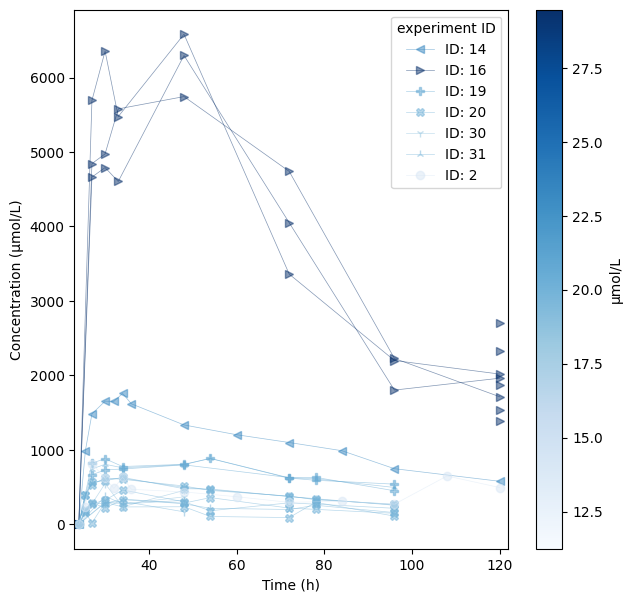

In [8]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    return ax.legend(*zip(*unique))

fig, ax = plt.subplots(1,1, figsize=(7,7))
# axi = ax.inset_axes([0.7, 0.02, 0.28, 0.35])

for i in Ci.id:
    data = Ci.sel(id=i)
    # data = data.where(np.logical_and(data.cext_nom >= cext_low, data.cext_nom < cext_high), drop=True)
    notnan = ~np.isnan(data.values)
    
    eid = int(data.experiment_id)
    cext = round(float(data.cext_nom), 2)
    

    l = ax.plot(
        data.time[notnan], 
        data.values[notnan], 
        marker=marker_dict[eid], 
        lw=0.5,
        alpha=.5,
        color=cmap(cext_color(data.cext_nom)),
        label=f"ID: {eid}"
    )
    # if cext < 20:

    #     l = axi.plot(
    #         data.time[notnan], 
    #         data.values[notnan], 
    #         marker=marker_dict[eid], 
    #         lw=0.5,
    #         alpha=.5,
    #         color=cmap(cext_color(data.cext_nom)),
    #         label=f"ID: {eid}"
    #     )



ax.set_xlim(23, 122)
ax.set_xlabel("Time (h)")
ax.set_ylabel("Concentration (µmol/L)")
legend = legend_without_duplicate_labels(ax)
legend.set_title("experiment ID")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=cext_color)
cbar = plt.colorbar(sm)
cbar.set_label("µmol/L")

fig.savefig(f"{sim.output_path}/internal_concentrations.png", transparent=True)